<a href="https://colab.research.google.com/github/geetharangaswamaiah/CourseraML/blob/master/Module2/Module2Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Module 2
* Logistic Regression without Regularization
* Logistice Regression with Regularization

In [0]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import expit
from scipy import optimize

# Read data
def readData(datafile):
  # Read comma separated values from datafile
  cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True)
  # Assign X and y
  X = np.transpose(np.array(cols[:-1]))
  y = np.transpose(np.array(cols[-1:]))
  # Number of training examples
  m = y.size 
  # Insert intercept term
  X = np.insert(X,0,1,axis=1)
  return X, y

# Plot data
def plotData(X, y, xl, yl):
  pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
  neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
  plt.figure()
  plt.plot(pos[:,1],pos[:,2],'bx',markersize=6,label='Positive')
  plt.plot(neg[:,1],neg[:,2],'yo',markersize=6,label='Negative')
  plt.title("Data")
  plt.ylabel(yl)
  plt.xlabel(xl)

# Hypothesis function, h(x)=sigmoid functio
def hypothesis(theta, X):
  h = expit(np.dot(X, theta))
  return h

# Compute cost
def cost(theta, X, y, lmbda):
  m = y.size
  term1 = np.dot(-np.array(y).T, np.log(hypothesis(theta, X)))
  term2 = np.dot((1-np.array(y)).T, np.log(1-hypothesis(theta, X)))
  # Skip theta_0
  regterm = (lmbda / 2) * np.sum(np.dot(theta[1:].T, theta[1:]))
  J = (1 / m) * (np.sum(term1 - term2) + regterm)
  return float(J)

# Gradient - check gradient for initial theta
def gradient(theta, X, y, lmbda):
  m = y.size
  grad = (np.dot((hypothesis(theta, X) - y).T, X)) / m
  return grad
  
# fmin function to find optimum theta (Gradient desecnt not required: Python built-in function to find minimum of a function)
def optimizeTheta(theta, X, y, lmbda):
    result = optimize.fmin(cost, x0 = theta, args=(X, y, lmbda), maxiter = 400, full_output=True)
    return result[0], result[1]

# Plot Decision Boundary
def plotDecisionBoundary(theta, X, y,xl,yl):
  # h(x)=g(theta(X)))
  # y=1 when g(theta(X))>=0.5 --> (theta(X)>=0
  # theta(X)=theta0+theta1x1+theta2x2 >= 0
  # solve for x2
  # x2=-(theta0/theta2)-(theta1/theta2)x1
  # plot x1 vs x2 to get the decision boundary
  plotData(X,y,xl,yl)
  plt.title("Decision Boundary")
  x_axis = X[:,1]
  y_axis = -(theta[0]/theta[2]) - np.dot((theta[1]/theta[2]),X[:,1])
  plt.plot(y_axis, x_axis, 'g-') 
  
# Prediction
def predict(theta, X):
  hx = hypothesis(theta, X)
  probability = hx >= 0.5
  return hx * 100, probability

# Accuracy
def getAccuracy(theta, X):
  pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
  neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
  pos_correct = float(np.sum(predict(theta, pos)[1]))
  neg_correct = float(np.sum(np.invert(predict(theta, neg)[1])))
  total = len(pos) + len(neg)
  accuracy = float(pos_correct + neg_correct) / total
  return accuracy * 100

# Feature Mapping
def featureMap(X1, X2):
  # Currently there are 2 features
  # We'll create more features
  # so logistic regression classifier trained on higher dimension feature vector will have more complex decision boundary
  # and appear non-linear when drawn on 2D plot
  degrees = 6 # x1, x2, x1^2, x2^2, x1x2, x1^3, x2^3... we'll get 28 terms for degree = 6
  out = np.ones( (X1.shape[0], 1) )
  for i in range(1, degrees+1):
    for j in range(0, i+1):
      term1 = X1 ** (i-j)
      term2 = X2 ** (j)
      term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
      out   = np.hstack(( out, term ))
  return out

# Using 'minimize' function to optimize regularized theta
def optimizeRegularizedTheta(theta, X, y, lmbda):
    result = optimize.minimize(cost, theta, args=(X, y, lmbda),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun

# Contour Plot
def contourPlot(theta):
  x1 = np.linspace(-1,1.5,50)
  x2 = np.linspace(-1,1.5,50)
  z = np.zeros((len(x1),len(x2)))
  for i in range(len(x1)):
    for j in range(len(x2)):
      features = featureMap(np.array([x1[i]]),np.array([x2[j]]))
      z[i][j] = np.dot(theta, features.T)
  z = z.transpose()
  u, v = np.meshgrid(x1, x2)
  mycontour = plt.contour(x1, x2, z, [0])
  title = "Decision Boundary : Lambda" ,lmbda
  plt.title(title)
  
  


LOGISTIC REGRESSION WITHOUT REGULARIZATION

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
Cost:  0.2034977015902151
Gradient:  [-25.16130062   0.20623142   0.20147143]
77.62915904112411 % Admission Probability
Model Accuracy:  89.0 %


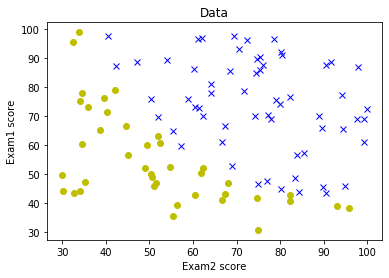

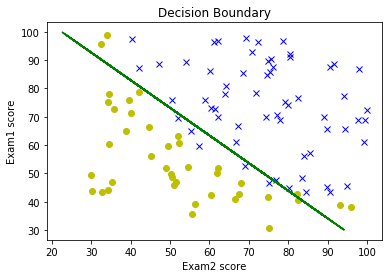

In [2]:
print("\nLOGISTIC REGRESSION WITHOUT REGULARIZATION\n")
# Reading data
X, y = readData('ex2data1.txt') # For each training example, you have the applicant's scores on two exams and the admissions decision.
# Plotting data
plotData(X,y,'Exam2 score','Exam1 score')
# Initialize parameters
lmbda = 0
initial_theta = np.zeros((X.shape[1],1))
# Compute cost for initial theta
costf = cost(initial_theta, X, y, lmbda)
# Compute gradient for initial theta
grad = gradient(initial_theta, X, y, lmbda)
# Compute theta that minimizes cost using Python built-in function fmin
optimum_theta, J_min = optimizeTheta(initial_theta, X, y, lmbda)
print("Cost: " ,J_min)
print("Gradient: " ,optimum_theta)
# Plot the decision boundary
plotDecisionBoundary(optimum_theta, X, y,'Exam2 score','Exam1 score')
# Prediction
#For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
#you should expect to see an admission probability of 0.776
X_test = np.array([1, 45, 85])
print(predict(optimum_theta, X_test)[0] ,"% Admission Probability")
# Accuracy
print("Model Accuracy: ",getAccuracy(optimum_theta, X),"%")


REGULARIZED LOGISTIC REGRESSION

Cost:  0.6931471805599454


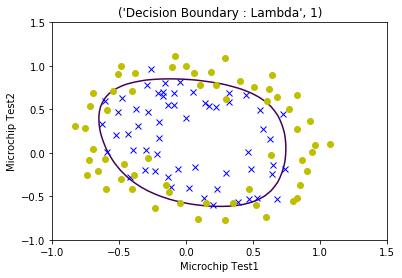

In [6]:
print("\nREGULARIZED LOGISTIC REGRESSION\n")
# Reading data
X, y = readData('ex2data2.txt') # Data consists of microchip QA test results (test1 and test2)
# Plotting data
plotData(X,y,'Microchip Test1', 'Microchip Test2')
# Initialize parameters
lmbda = 1
initial_theta = np.zeros((X.shape[1],1))
# Feature Mapping
X_map = featureMap(X[:,1],X[:,2])
# Compute cost
initial_theta = np.zeros((X_map.shape[1],1))
print("Cost: " ,cost(initial_theta, X_map, y, 0))
# Optimization
optimum_theta, J_min = optimizeRegularizedTheta(initial_theta, X_map, y, lmbda)
# Plot Decision Boundary
contourPlot(optimum_theta)